# Optimum no of principle components

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')

In [3]:
import matplotlib.pyplot as plt


In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


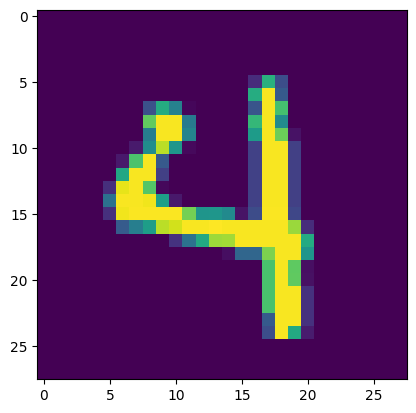

In [5]:
plt.imshow(df.iloc[18306 , 1:].values.reshape(28 , 28))

In [6]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [7]:
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components = None) #selecting all principle components

In [14]:
X_train_all = pca.fit_transform(X_train)
X_test_all = pca.transform(X_test)

**Eigen vectors**

In [15]:
print(pca.components_)# all eigen vectors/principle components
print('\n')
print(pca.components_.shape)

[[-2.95991626e-19  1.11022302e-16  1.11022302e-16 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.96017127e-20 -2.08166817e-17 -3.81639165e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.27212013e-20 -1.73472348e-17  2.08166817e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  9.44128053e-02  3.72703546e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -2.84178660e-02 -1.04237496e-02 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  2.21652344e-02  3.92484334e-02 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]


(784, 784)


**Eigen Values of respective eigen vectors/principle components**

In [16]:
print(pca.explained_variance_) #784 eigen values
print('\n')
print(pca.explained_variance_.shape)

[4.05584672e+01 2.92773174e+01 2.67836048e+01 2.06586479e+01
 1.80331676e+01 1.56893851e+01 1.38417614e+01 1.25558062e+01
 1.10213390e+01 1.00730167e+01 9.60910035e+00 8.64768221e+00
 8.01533400e+00 7.88172542e+00 7.38267632e+00 7.14960165e+00
 6.80294058e+00 6.57770836e+00 6.37845537e+00 6.24312136e+00
 6.01500992e+00 5.78295578e+00 5.49097563e+00 5.33247360e+00
 5.12676459e+00 4.97713738e+00 4.88512940e+00 4.75746488e+00
 4.53065263e+00 4.36800220e+00 4.31098264e+00 4.22493466e+00
 4.07976336e+00 4.03094768e+00 3.98834062e+00 3.84770651e+00
 3.80309206e+00 3.72530989e+00 3.67684808e+00 3.44973222e+00
 3.43908666e+00 3.39500328e+00 3.30493576e+00 3.25924779e+00
 3.22532602e+00 3.16633287e+00 3.11617943e+00 3.09948415e+00
 3.09599165e+00 2.96633251e+00 2.95664074e+00 2.92156657e+00
 2.87035809e+00 2.82770893e+00 2.78332206e+00 2.77244713e+00
 2.69601792e+00 2.61711532e+00 2.59593459e+00 2.58111827e+00
 2.55078327e+00 2.52125001e+00 2.45916290e+00 2.45390751e+00
 2.44594560e+00 2.406783

**Explained variance/eigen values in terms of percentage**

In [17]:
print(pca.explained_variance_ratio_)
print('\n')
print('variance explained by each eigen vectors in terms of percentage')
print('\n')
print(pca.explained_variance_ratio_.shape)


[5.70428995e-02 4.11766811e-02 3.76694333e-02 2.90550718e-02
 2.53625011e-02 2.20661203e-02 1.94675554e-02 1.76589413e-02
 1.55008110e-02 1.41670560e-02 1.35145873e-02 1.21624139e-02
 1.12730565e-02 1.10851445e-02 1.03832638e-02 1.00554591e-02
 9.56790239e-03 9.25112764e-03 8.97089100e-03 8.78055235e-03
 8.45972813e-03 8.13335878e-03 7.72270730e-03 7.49978429e-03
 7.21046769e-03 7.00002655e-03 6.87062319e-03 6.69107118e-03
 6.37207421e-03 6.14331674e-03 6.06312236e-03 5.94210136e-03
 5.73792718e-03 5.66927104e-03 5.60934692e-03 5.41155401e-03
 5.34880662e-03 5.23941096e-03 5.17125251e-03 4.85182853e-03
 4.83685623e-03 4.77485575e-03 4.64818153e-03 4.58392432e-03
 4.53621551e-03 4.45324541e-03 4.38270778e-03 4.35922694e-03
 4.35431496e-03 4.17195765e-03 4.15832678e-03 4.10899720e-03
 4.03697573e-03 3.97699241e-03 3.91456511e-03 3.89927022e-03
 3.79177740e-03 3.68080592e-03 3.65101657e-03 3.63017835e-03
 3.58751412e-03 3.54597747e-03 3.45865591e-03 3.45126454e-03
 3.44006661e-03 3.384987

**apply cumsum on explained variance ratio until you reach 90 percent**

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0570429 , 0.09821958, 0.13588901, 0.16494409, 0.19030659,
       0.21237271, 0.23184026, 0.2494992 , 0.26500001, 0.27916707,
       0.29268166, 0.30484407, 0.31611713, 0.32720227, 0.33758554,
       0.347641  , 0.3572089 , 0.36646003, 0.37543092, 0.38421147,
       0.3926712 , 0.40080456, 0.40852726, 0.41602705, 0.42323752,
       0.43023754, 0.43710817, 0.44379924, 0.45017131, 0.45631463,
       0.46237775, 0.46831985, 0.47405778, 0.47972705, 0.4853364 ,
       0.49074795, 0.49609676, 0.50133617, 0.50650742, 0.51135925,
       0.5161961 , 0.52097096, 0.52561914, 0.53020307, 0.53473928,
       0.53919253, 0.54357524, 0.54793446, 0.55228878, 0.55646073,
       0.56061906, 0.56472806, 0.56876503, 0.57274203, 0.57665659,
       0.58055586, 0.58434764, 0.58802845, 0.59167946, 0.59530964,
       0.59889715, 0.60244313, 0.60590179, 0.60935305, 0.61279312,
       0.61617811, 0.61954259, 0.62282929, 0.62610736, 0.62933419,
       0.63251041, 0.63565424, 0.6387819 , 0.64190065, 0.64498

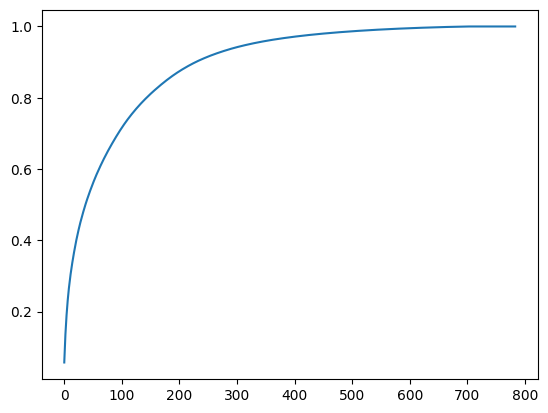

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

**As you can see , 90% variance explained for principle component 400**

In [20]:
pca = PCA(n_components= 400)
X_train_400 = pca.fit_transform(X_train)
X_test_400 = pca.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5, p = 1)
model.fit(X_train_400 , y_train)
y_pred = model.predict(X_test_400)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print(accuracy_score(y_test , y_pred))

0.9257222222222222


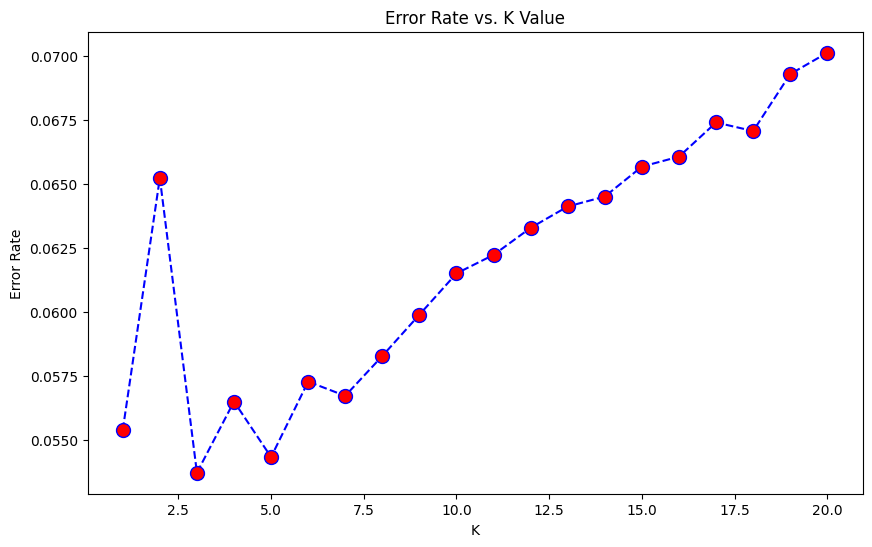

In [26]:
error_rate = []
for i in range(1, 21):  # Trying k values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_400, y_train)
    pred_i = knn.predict(X_test_400)
    error_rate.append(np.mean(pred_i != y_test))

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [27]:
model = KNeighborsClassifier(n_neighbors= 3)
model.fit(X_train_400 , y_train)
y_pred = model.predict(X_test_400)
print(accuracy_score(y_pred , y_test))

0.9462777777777778
